In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
path = '../data/'

df_weekly = pd.read_csv(path+'weekly_data.csv').rename(columns={'Unnamed: 0': 'year_week'}).set_index('year_week')
df_monthly = pd.read_csv(path+'monthly_data.csv').rename(columns={'Unnamed: 0': 'year_month'}).set_index('year_month')
df_yearly = pd.read_csv(path+'yearly_data.csv').set_index('year')
df_weekly_cumulative = pd.read_csv(path+'weekly_data_cumulative.csv').set_index('week')
df_monthly_cumulative = pd.read_csv(path+'monthly_data_cumulative.csv').set_index('month')

In [3]:
# Function to plot two line charts together for comparison purposes.

def compare_lines(df=None, same_axis=False, cols_list=None, style='o-', title=None):
    
    if same_axis:
        
        ax = df.plot(y=cols_list, legend=False, ylabel=cols_list[0].split('_')[-1], style=style, color=['b', 'r', 'g'], figsize=(16,6))
        
    else:

        ax = df.plot(y=cols_list[0], legend=False, ylabel=cols_list[0], style=style, figsize=(16,6))

        ax2 = ax.twinx()

        df.plot(y=cols_list[1], ax=ax2, legend=False, ylabel=cols_list[1], color='r', style=style)
    
    ax.figure.legend()
    
    plt.title(title)
    
    plt.show();

In [4]:
# Function to plot three line charts together for comparison purposes.

def compare_3_lines(df=None, cols_list=None, ylim=[20, 30], start=2012, end=2023, style='o-', title=None):

    ax = df.plot(y=cols_list[0], legend=False, ylabel=cols_list[0], style=style, figsize=(16,9))
    
    df.plot(y=cols_list[1], ax=ax, legend=False, ylabel=cols_list[1], color='r', style=style)
        
    ax2 = ax.twinx()

    ax2.set_ylim(ylim[0], ylim[1])

    df.plot(y=cols_list[2], ax=ax2, legend=False, ylabel=cols_list[2], color='g', style=style)
    
    ax.figure.legend()
    
    plt.title(title)
    
    # plt.xlim(start, end)
    
    plt.show();

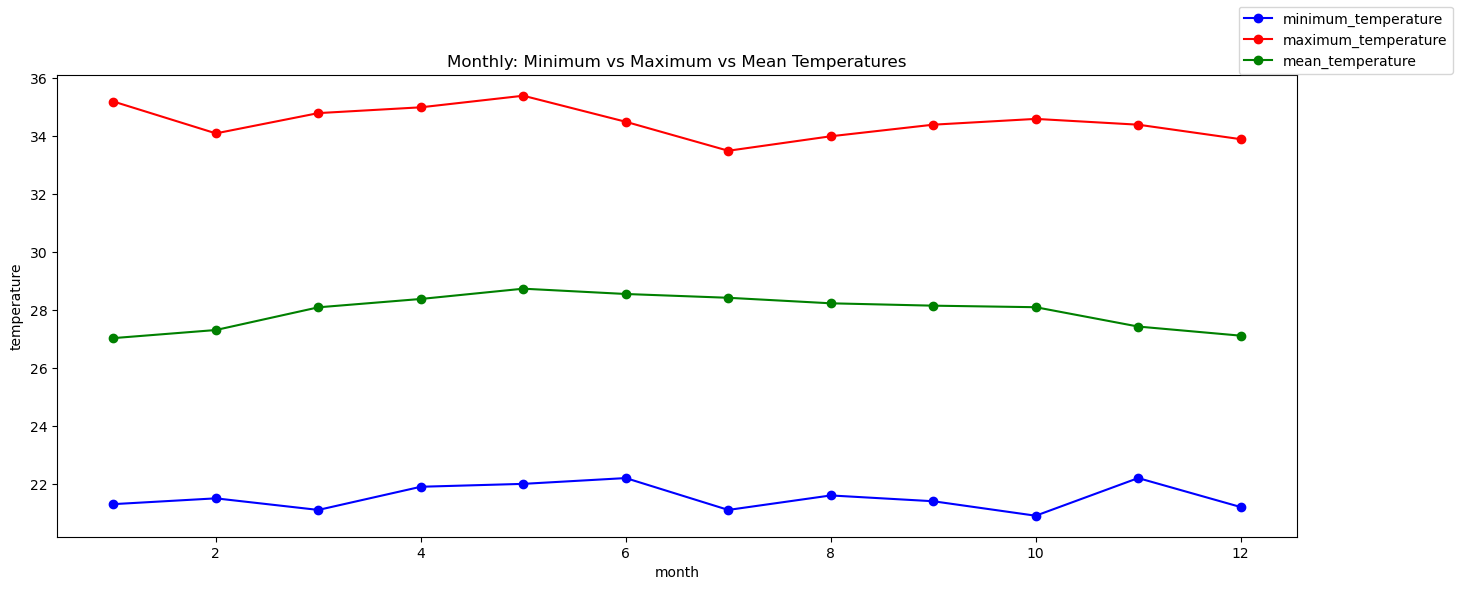

In [5]:
# Min vs max temperature.

compare_lines(
    df=df_monthly_cumulative, 
    cols_list=['minimum_temperature', 'maximum_temperature', 'mean_temperature'], 
    style='o-',
    title='Monthly: Minimum vs Maximum vs Mean Temperatures',
    same_axis=True
)

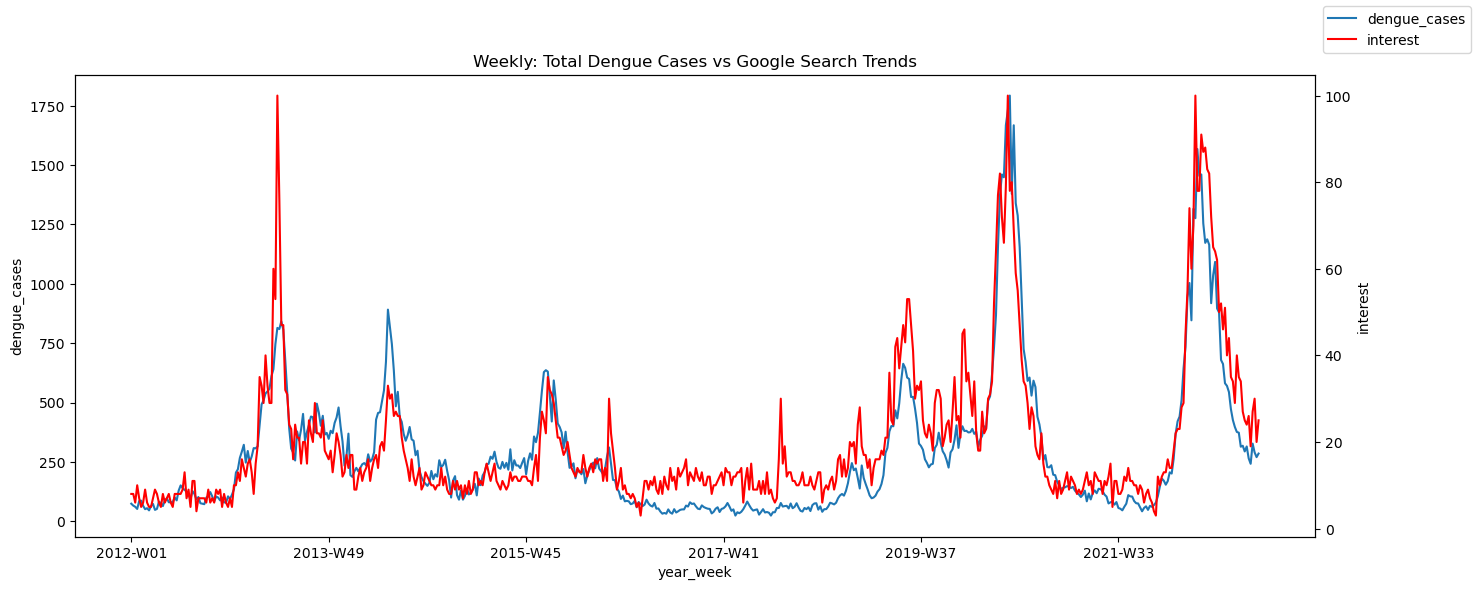

In [6]:
# Google search trends are closely related to and affected by prevailing dengue cases.

compare_lines(
    df=df_weekly, 
    cols_list=['dengue_cases', 'interest'], 
    style='-',
    title='Weekly: Total Dengue Cases vs Google Search Trends'
)

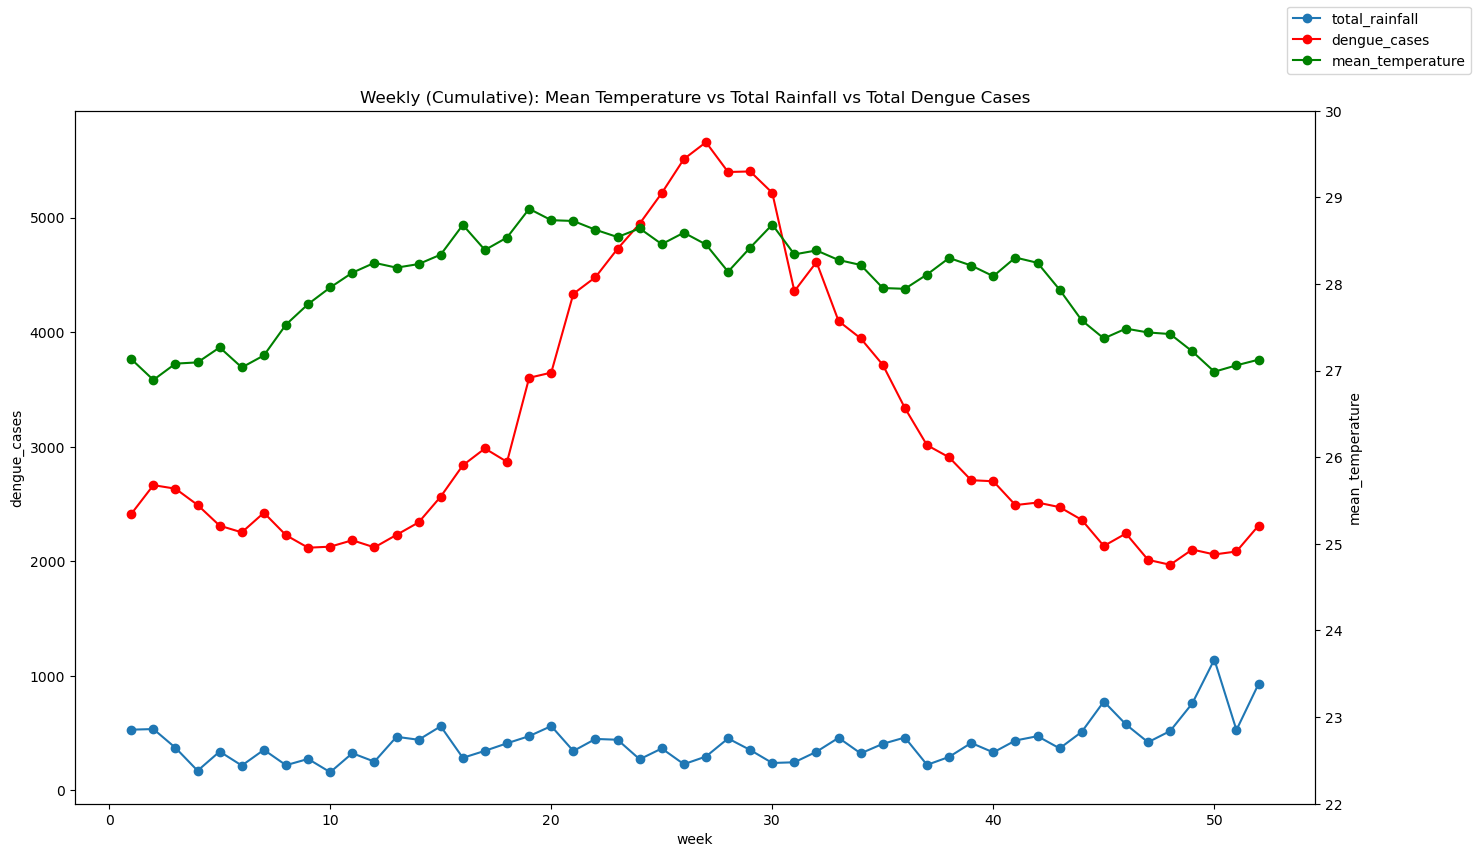

In [7]:
# Examining relationships between temperature, rainfall & dengue cases.

compare_3_lines(
    df=df_weekly_cumulative, 
    cols_list=['total_rainfall', 'dengue_cases', 'mean_temperature'],
    ylim=[22,30],
    style='o-',
    title='Weekly (Cumulative): Mean Temperature vs Total Rainfall vs Total Dengue Cases'
)